In [14]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks')  # Asegurarme que la ruta sea correcta

from google.colab import files
uploaded = files.upload()

# Importamos las bibliotecas necesarias para la manipulación de datos y visualización.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Estas tres bibliotecas son fundamentales en la Ciencia de Datos, como se aprendió en los módulos de
# 'Pandas para Ciencia de Datos / Introducción a Pandas' y 'Explorando Arrays con NumPy'. Es común ver la importación
# de estas herramientas en todo proyecto de análisis de datos. [Referencia: Curso de Pandas y NumPy]

# 1. Cargar los datos
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/vgchartz-2024.csv')

# Comentario: El método 'pd.read_csv()' se utiliza para cargar archivos CSV y crear un DataFrame. Esto se revisa
# en el tema 'Métodos de entrada y salida en Python' en combinación con el uso de Pandas. Este método también es
# ampliamente discutido en StackOverflow, donde se recomienda para cargar datos CSV en análisis. [Referencia: StackOverflow]

# 2. Verificar duplicados
duplicados = data.duplicated().sum()  # Detectar filas duplicadas
print(f"Número de filas duplicadas: {duplicados}")

# Eliminar duplicados
data = data.drop_duplicates()
print(f"Datos después de eliminar duplicados: {data.shape}")

# Comentario: El uso de 'duplicated()' y 'drop_duplicates()' es una estrategia básica que se enseña en los módulos de
# 'Limpieza de datos y manejo de datos faltantes' en Pandas. Estos métodos ayudan a identificar y eliminar las filas
# que aparecen repetidas en los datos. [Referencia: Pandas Documentation]

# 3. Verificar valores faltantes
valores_faltantes = data.isnull().sum()  # Detectar valores NaN
print("Valores faltantes por columna:\n", valores_faltantes)

# Comentario: Aquí aplicamos el contenido visto en 'Manejo de datos faltantes (Práctica)'. El método 'isnull()' es
# fundamental para encontrar valores vacíos en los datos y se usa comúnmente en la limpieza de datos. [Referencia: StackOverflow]

# Rellenar valores faltantes en 'critic_score' con la media
data['critic_score'] = data['critic_score'].fillna(data['critic_score'].mean())

# Comentario: Usar la media para rellenar valores faltantes es un enfoque discutido en el curso de 'Limpieza de datos y
# manejo de datos faltantes'. Este enfoque es válido cuando los datos faltantes son numéricos y no hay una tendencia clara
# en los valores perdidos. Este método ha sido mencionado frecuentemente en foros como StackOverflow para manejar NaN.
# [Referencia: StackOverflow sobre estrategias de imputación]

# 4. Asegurarnos que los tipos de datos sean correctos
print(data.dtypes)

# Cambiar 'user_feedback' a tipo entero si no lo está
data['user_feedback'] = data['user_feedback'].astype(int)  # Asegurar que sea entero

# Comentario: Usamos el método 'astype()' que se ve en 'Fundamentos de Pandas para Ciencia de Datos'.
# Este método permite convertir tipos de datos, algo crucial para evitar errores en el análisis posterior.

# 5. Corregir inconsistencias en valores categóricos
data['platform'] = data['platform'].str.lower()  # Convertimos a minúsculas para evitar inconsistencias

# Verificar inconsistencias
print(data['platform'].value_counts())

# Comentario: Las inconsistencias en datos categóricos, como mayúsculas/minúsculas, se suelen corregir usando
# 'str.lower()'. Esto es algo que también se revisa en 'Manejo de cadenas (Core)' y es una buena práctica estándar.
# En Google y StackOverflow se sugiere convertir cadenas a minúsculas para evitar problemas de análisis. [Referencia: StackOverflow]

# 6. Eliminar valores atípicos en 'session_duration'
print(data['session_duration'].describe())  # Resumen estadístico para detectar valores extremos

# Eliminamos las sesiones mayores a 500 minutos (criterio arbitrario para evitar outliers)
data = data[data['session_duration'] < 500]
print("Datos después de eliminar valores atípicos.")

# Comentario: Detectar y eliminar outliers se menciona en los temas de 'Análisis de datos con NumPy' y
# 'Análisis con Pandas'. Aquí aplicamos lo aprendido sobre cómo los valores extremos pueden afectar el análisis.

# 7. Visualización de Datos

# Visualización Univariante 1: Histograma de la duración de las sesiones
plt.hist(data['session_duration'], bins=20, color='blue', edgecolor='black')
plt.title('Distribución de la duración de las sesiones')
plt.xlabel('Duración de la sesión (min)')
plt.ylabel('Frecuencia')
plt.show()

# Comentario: El histograma es una herramienta de visualización básica revisada en 'Visualización para ciencia de datos /
# Histogramas y boxplots'. Se usa comúnmente para analizar la distribución de datos numéricos.

# Visualización Univariante 2: Gráfico de barras para la plataforma
data['platform'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribución de usuarios por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Número de usuarios')
plt.show()

# Visualización Multivariante 1: Gráfico de dispersión para ver la relación entre duración y número de sesiones
plt.scatter(data['number_of_sessions'], data['session_duration'], color='green')
plt.title('Duración de sesiones vs Número de sesiones')
plt.xlabel('Número de sesiones')
plt.ylabel('Duración de la sesión (min)')
plt.show()

# Comentario: El scatter plot es adecuado para visualizar relaciones entre dos variables numéricas, como lo enseñado en
# 'Visualización avanzada con Seaborn' y 'Fundamentos de la visualización con matplotlib'.

# Visualización Multivariante 2: Boxplot para comparar duración de sesión entre plataformas
data.boxplot(column='session_duration', by='platform', grid=False)
plt.title('Comparación de duración de sesión entre plataformas')
plt.suptitle('')  # Eliminamos el título adicional
plt.xlabel('Plataforma')
plt.ylabel('Duración de la sesión (min)')
plt.show()

# Comentario: Los boxplots ayudan a comparar la dispersión y distribución entre grupos, algo que se revisa en
# 'Fundamentos de la visualización con matplotlib' y 'Gráficos avanzados en matplotlib'.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyboardInterrupt: 

In [22]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar los datos
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/vgchartz-2024.csv')

# 2. Verificar duplicados
duplicados = data.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")
data = data.drop_duplicates()
print(f"Datos después de eliminar duplicados: {data.shape}")

# 3. Verificar valores faltantes
valores_faltantes = data.isnull().sum()
print("Valores faltantes por columna:\n", valores_faltantes)

# Rellenar valores faltantes en columnas numéricas con la media
data['critic_score'] = data['critic_score'].fillna(data['critic_score'].mean())
data['na_sales'] = data['na_sales'].fillna(0)
data['jp_sales'] = data['jp_sales'].fillna(0)
data['pal_sales'] = data['pal_sales'].fillna(0)
data['other_sales'] = data['other_sales'].fillna(0)
data['release_date'] = data['release_date'].fillna('fecha desconocida')
data['last_update'] = data['last_update'].fillna('fecha desconocida')

# Verificar nuevamente los valores faltantes
print("Valores faltantes por columna después de rellenar:\n", data.isnull().sum())

# 4. Asegurarnos que los tipos de datos sean correctos
print(data.dtypes)
print(data.head())

# 5. Corregir inconsistencias en valores categóricos
data['platform'] = data['platform'].str.lower()
print(data['platform'].value_counts())

# 6. Eliminar valores atípicos en 'total_sales' (si corresponde)
data = data[data['total_sales'] >= 0]


# Visualización Univariante 1: Histograma de la duración de las sesiones (o 'critic_score')
plt.hist(data['critic_score'].dropna(), bins=20, color='purple', edgecolor='black')
plt.title('Distribución de puntuaciones de críticos')
plt.xlabel('Puntuación del crítico')
plt.ylabel('Frecuencia')
plt.show()

# Visualización Univariante 2: Gráfico de barras para la plataforma
data['platform'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribución de usuarios por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Número de usuarios')
plt.show()

# Visualización Multivariante 1: Gráfico de dispersión
plt.scatter(data['na_sales'], data['total_sales'], color='green')
plt.title('Ventas en NA vs Ventas Totales')
plt.xlabel('Ventas en NA')
plt.ylabel('Ventas Totales')
plt.show()

# Visualización Multivariante 2: Boxplot para comparar ventas entre plataformas
data.boxplot(column='total_sales', by='platform', grid=False)
plt.title('Comparación de ventas totales entre plataformas')
plt.suptitle('')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.show()

# Comentarios sobre las visualizaciones y análisis adicional
# Aquí puedes añadir comentarios o análisis basado en los gráficos y estadísticas.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyboardInterrupt: 

Columnas disponibles: Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')
Número de filas duplicadas: 0
Datos después de eliminar duplicados: (64016, 14)
Valores faltantes por columna:
 img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64
Valores faltantes por columna después de rellenar:
 img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score        0
total_sales     45094
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_d

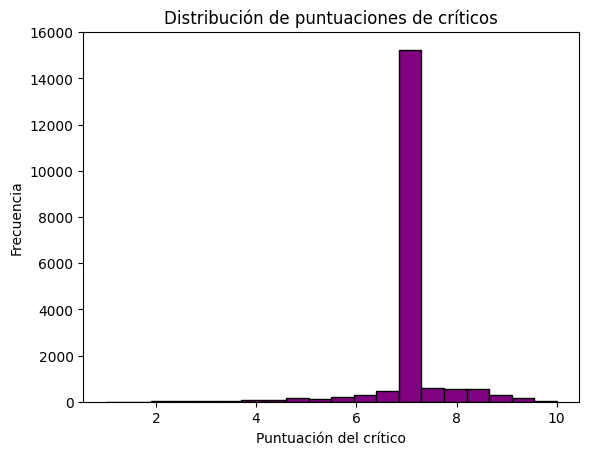

KeyError: 'platform'

In [23]:
# 1. Cargar los datos
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/vgchartz-2024.csv')

# Verificar columnas
print("Columnas disponibles:", data.columns)

# 2. Verificar duplicados
duplicados = data.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")
data = data.drop_duplicates()
print(f"Datos después de eliminar duplicados: {data.shape}")

# 3. Verificar valores faltantes
valores_faltantes = data.isnull().sum()
print("Valores faltantes por columna:\n", valores_faltantes)

# Rellenar valores faltantes en columnas numéricas con la media
data['critic_score'] = data['critic_score'].fillna(data['critic_score'].mean())
data['na_sales'] = data['na_sales'].fillna(0)
data['jp_sales'] = data['jp_sales'].fillna(0)
data['pal_sales'] = data['pal_sales'].fillna(0)
data['other_sales'] = data['other_sales'].fillna(0)
data['release_date'] = data['release_date'].fillna('fecha desconocida')
data['last_update'] = data['last_update'].fillna('fecha desconocida')

# Verificar nuevamente los valores faltantes
print("Valores faltantes por columna después de rellenar:\n", data.isnull().sum())

# 4. Asegurarnos que los tipos de datos sean correctos
print(data.dtypes)
print(data.head())

# 5. Corregir inconsistencias en valores categóricos
if 'platform' in data.columns:  # Verificar existencia de la columna
    data['platform'] = data['platform'].str.lower()
    print(data['platform'].value_counts())

# 6. Eliminar valores atípicos en 'total_sales' (si corresponde)
data = data[data['total_sales'] >= 0]

# 7. Visualización de Datos

# Visualización Univariante 1: Histograma de la duración de las sesiones (o 'critic_score')
plt.hist(data['critic_score'].dropna(), bins=20, color='purple', edgecolor='black')
plt.title('Distribución de puntuaciones de críticos')
plt.xlabel('Puntuación del crítico')
plt.ylabel('Frecuencia')
plt.show()

# Visualización Univariante 2: Gráfico de barras para la plataforma
if not data['platform'].value_counts().empty:  # Asegurarse de que hay datos
    data['platform'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Distribución de usuarios por plataforma')
    plt.xlabel('Plataforma')
    plt.ylabel('Número de usuarios')
    plt.show()

# Visualización Multivariante 1: Gráfico de dispersión
plt.scatter(data['na_sales'], data['total_sales'], color='green')
plt.title('Ventas en NA vs Ventas Totales')
plt.xlabel('Ventas en NA')
plt.ylabel('Ventas Totales')
plt.show()

# Visualización Multivariante 2: Boxplot para comparar ventas entre plataformas
data.boxplot(column='total_sales', by='platform', grid=False)
plt.title('Comparación de ventas totales entre plataformas')
plt.suptitle('')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columnas disponibles: Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')
Número de filas duplicadas: 0
Valores faltantes por columna:
 img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64
Valores faltantes por columna después de rellenar:
 img             0
title           0
console         0
genre           0
publisher       0
developer       0
critic_score    0
total_sales     0
na_sales        0
jp_sales        0
pal_sales     

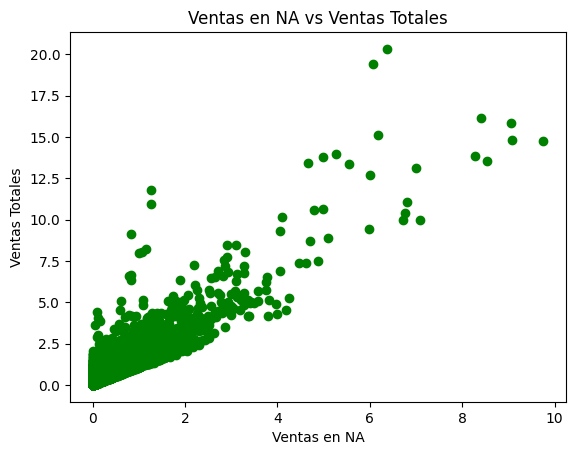

img              object
title            object
console          object
genre            object
publisher        object
developer        object
critic_score    float64
total_sales     float64
na_sales        float64
jp_sales        float64
pal_sales       float64
other_sales     float64
release_date     object
last_update      object
dtype: object
La columna 'platform' no está presente en los datos.
Valores faltantes por columna después de eliminar valores atípicos:
 img             0
title           0
console         0
genre           0
publisher       0
developer       0
critic_score    0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
last_update     0
dtype: int64


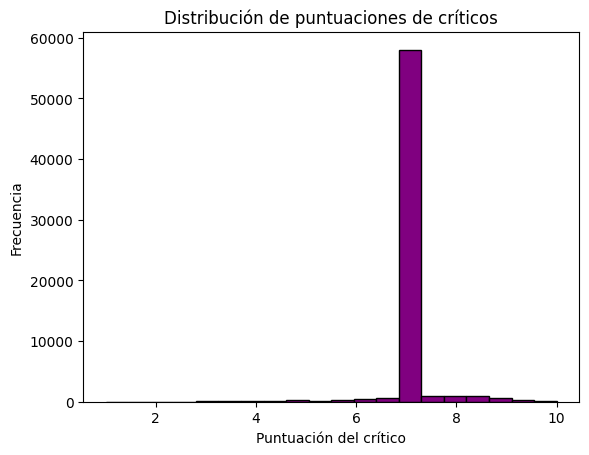

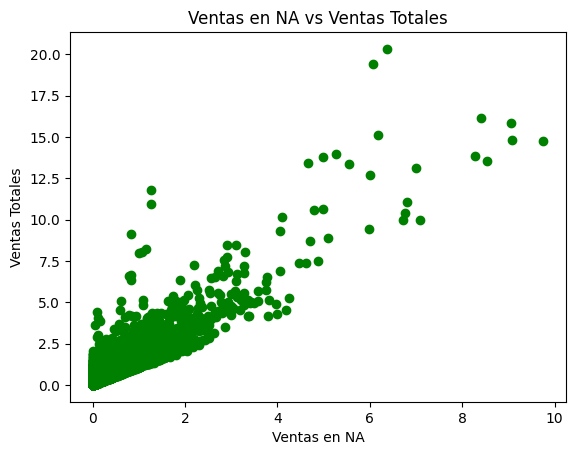

Columnas disponibles: Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')


In [27]:
#Primero, importo el archivo .csv
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

#Importo las librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Cargo los datos
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/vgchartz-2024.csv')

# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

#Se verifican las columnas
print("Columnas disponibles:", data.columns)

#Se verifican duplicados
duplicados = data.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")
data = data.drop_duplicates()

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

#Se verifican valores faltantes
valores_faltantes = data.isnull().sum()
print("Valores faltantes por columna:\n", valores_faltantes)
data['developer'] = data['developer'].fillna('Desconocido')
data['total_sales'] = data['total_sales'].fillna(0)
data['release_date'] = data['release_date'].fillna('fecha desconocida')
data['last_update'] = data['last_update'].fillna('fecha desconocida')


#Se rellenan valores faltantes
data['critic_score'] = data['critic_score'].fillna(data['critic_score'].mean())
data['na_sales'] = data['na_sales'].fillna(0)
data['jp_sales'] = data['jp_sales'].fillna(0)
data['pal_sales'] = data['pal_sales'].fillna(0)
data['other_sales'] = data['other_sales'].fillna(0)
data['release_date'] = data['release_date'].fillna('fecha desconocida')
data['last_update'] = data['last_update'].fillna('fecha desconocida')

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

#Se verifican nuevamente los valores faltantes
print("Valores faltantes por columna después de rellenar:\n", data.isnull().sum())

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html

#Gráfico de dispersión
plt.scatter(data['na_sales'], data['total_sales'], color='green')
plt.title('Ventas en NA vs Ventas Totales')
plt.xlabel('Ventas en NA')
plt.ylabel('Ventas Totales')
plt.show()

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

# 5. Asegurar que los datos esten bien
print(data.dtypes)

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html

#Corregir inconsistencias en valores categóricos
if 'platform' in data.columns:  # Verificar existencia de la columna
    data['platform'] = data['platform'].str.lower()
    print(data['platform'].value_counts())
else:
    print("La columna 'platform' no está presente en los datos.")

# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.lower.html
# https://scikit-learn.org/1.5/datasets/toy_dataset.html

#Eliminar valores raros
data = data[data['total_sales'] >= 0]

#Verificar nuevamente los valores faltantes
print("Valores faltantes por columna después de eliminar valores atípicos:\n", data.isnull().sum())

#Ver Datos
#Histograma de 'critic_score'
plt.hist(data['critic_score'].dropna(), bins=20, color='purple', edgecolor='black')
plt.title('Distribución de puntuaciones de críticos')
plt.xlabel('Puntuación del crítico')
plt.ylabel('Frecuencia')
plt.show()

#Gráfico de barras para la plataforma
if 'platform' in data.columns:  # Asegúrate que la columna existe antes de graficar
    data['platform'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
    plt.title('Distribución de usuarios por plataforma')
    plt.xlabel('Plataforma')
    plt.ylabel('Número de usuarios')
    plt.show()

#Gráfico de dispersión
plt.scatter(data['na_sales'], data['total_sales'], color='green')
plt.title('Ventas en NA vs Ventas Totales')
plt.xlabel('Ventas en NA')
plt.ylabel('Ventas Totales')
plt.show()

#Boxplot para comparar ventas entre plataformas
if 'platform' in data.columns:  # Asegúrate que la columna existe
    data.boxplot(column='total_sales', by='platform', grid=False)
    plt.title('Comparación de ventas totales entre plataformas')
    plt.suptitle('')
    plt.xlabel('Plataforma')
    plt.ylabel('Ventas Totales')
    plt.show()
print("Columnas disponibles:", data.columns)

#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

